In [1]:
#important library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load Dataset
df = pd.read_csv("diabetic_data.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.shape

(101766, 50)

In [6]:
#Missing value check
df.isna().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
#Missing percantge
(df.isnull().sum()/ len(df)) *100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [8]:
df.describe(include="all")

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Target variable
df["readmitted"].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [10]:
df["readmitted"].value_counts(normalize=True)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

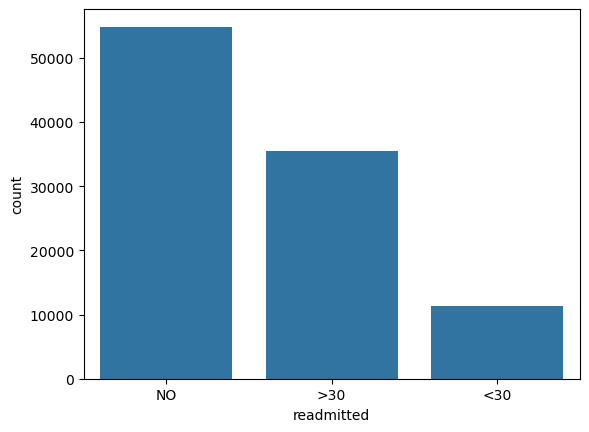

In [11]:
sns.countplot(x="readmitted",data=df)
plt.show()

In [12]:
#Remove useless
drop_cols = ["encounter_id", "patient_nbr"]
df.drop(columns=drop_cols, inplace=True)

In [13]:
#Handle Missing values
df.replace("?", np.nan, inplace=True)
df.isna().mean().sort_values(ascending=False).head(10)

weight               0.968585
max_glu_serum        0.947468
A1Cresult            0.832773
medical_specialty    0.490822
payer_code           0.395574
race                 0.022336
diag_3               0.013983
diag_2               0.003518
diag_1               0.000206
time_in_hospital     0.000000
dtype: float64

In [14]:
df.dropna(thresh=len(df)*0.5,axis=1,inplace=True)

In [15]:
df.fillna("Unknown",inplace=True)

In [16]:
#age group
df["age"].value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

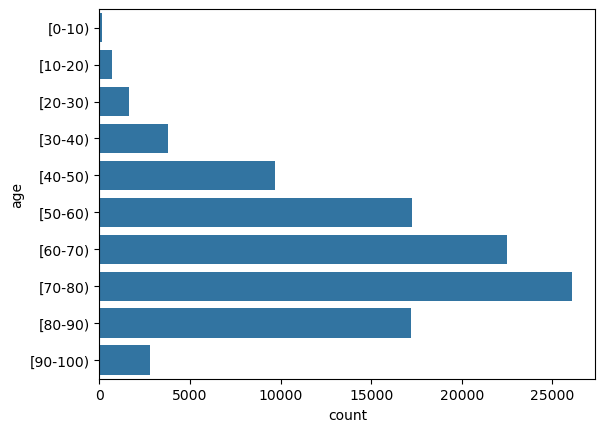

In [17]:
sns.countplot(y="age", data=df)
plt.show()

In [18]:
pd.crosstab(df["age"],df["readmitted"],normalize="index")

readmitted,<30,>30,NO
age,,,
[0-10),0.018634,0.161491,0.819876
[10-20),0.057887,0.324168,0.617945
[20-30),0.142426,0.307785,0.549789
[30-40),0.112318,0.314437,0.573245
[40-50),0.106040,0.338462,0.555498
[50-60),0.096662,0.342895,0.560443
[60-70),0.111284,0.351243,0.537473
[70-80),0.117731,0.363472,0.518797
[80-90),0.120835,0.361865,0.517300


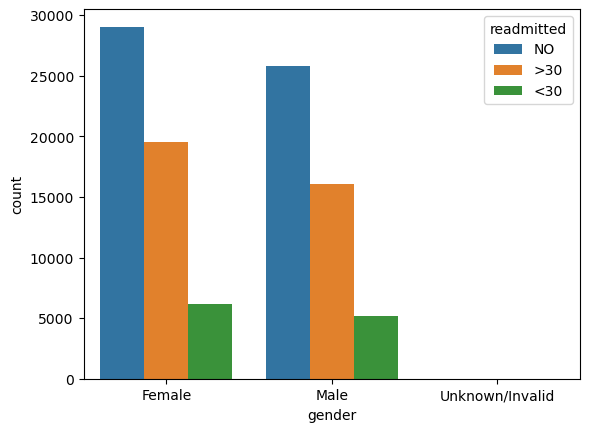

In [19]:
#Gender and Readmission
sns.countplot(x="gender", hue="readmitted", data=df)
plt.show()

In [20]:
#Race analysis
df["race"].value_counts(normalize=True)

race
Caucasian          0.747784
AfricanAmerican    0.188766
Unknown            0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

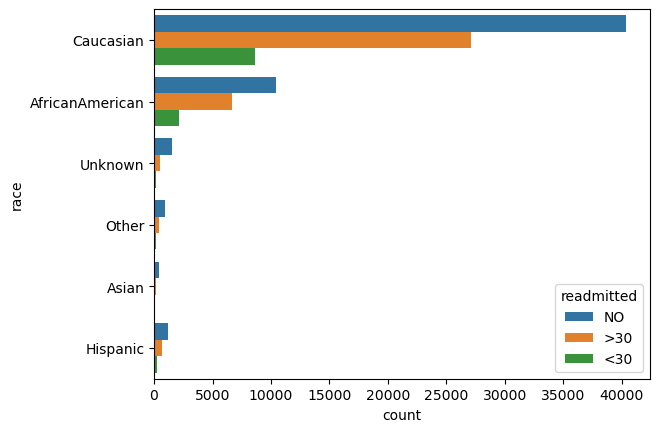

In [21]:
sns.countplot(y="race", hue="readmitted", data=df)
plt.show()

In [22]:
#Hospital stay analysis
df["time_in_hospital"].describe()

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

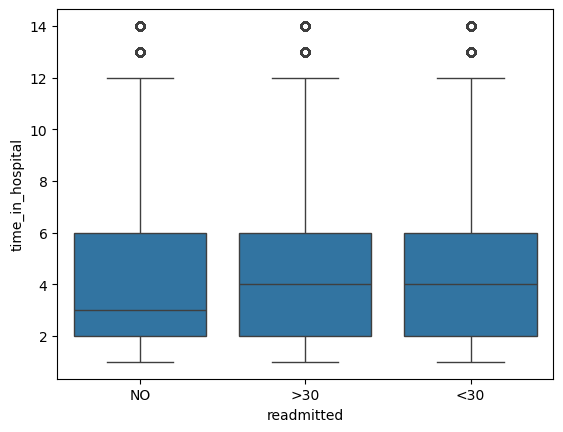

In [23]:
sns.boxplot(x="readmitted",y="time_in_hospital",data=df)
plt.show()

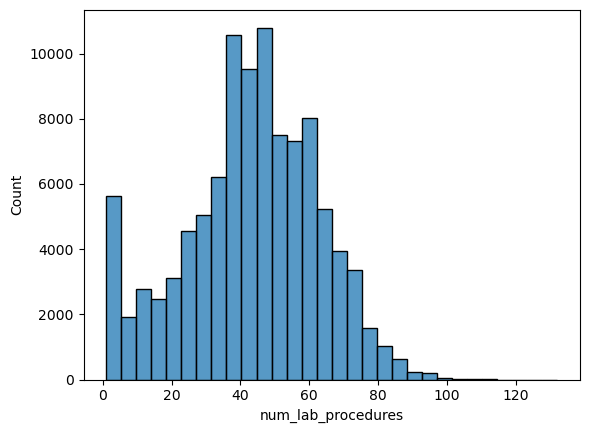

In [24]:
#number of procedures and lab test
sns.histplot(df["num_lab_procedures"],bins=30)
plt.show()

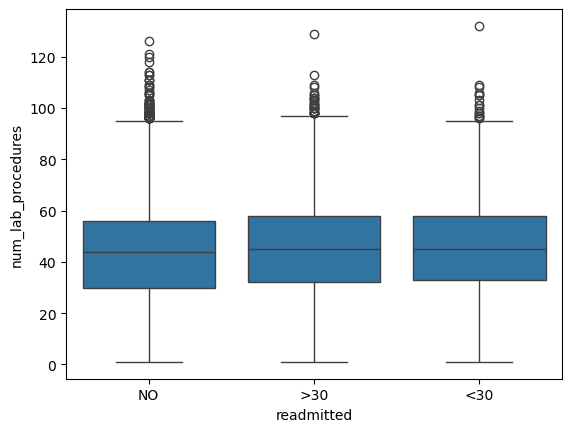

In [25]:
sns.boxplot(x="readmitted",y="num_lab_procedures",data=df)
plt.show()

In [26]:
#Medication Analysis
df["num_medications"].describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

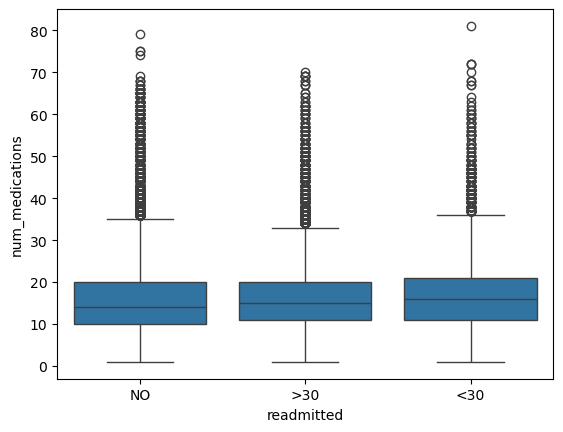

In [27]:
sns.boxplot(x="readmitted", y="num_medications", data=df)
plt.show()            

In [28]:
df[["number_emergency", "number_inpatient", "number_outpatient"]].describe()

,number_emergency,number_inpatient,number_outpatient
count,101766.000000,101766.000000,101766.000000
mean,0.197836,0.635566,0.369357
std,0.930472,1.262863,1.267265
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,76.000000,21.000000,42.000000


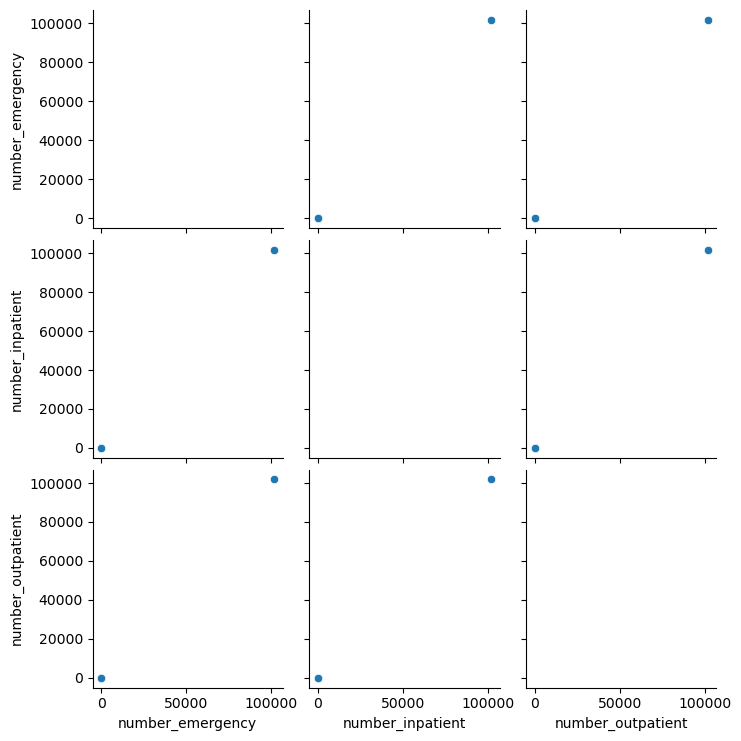

In [29]:
#Emergency and impatient
sns.pairplot(
df[["number_emergency","number_inpatient","number_outpatient"]].describe()
)

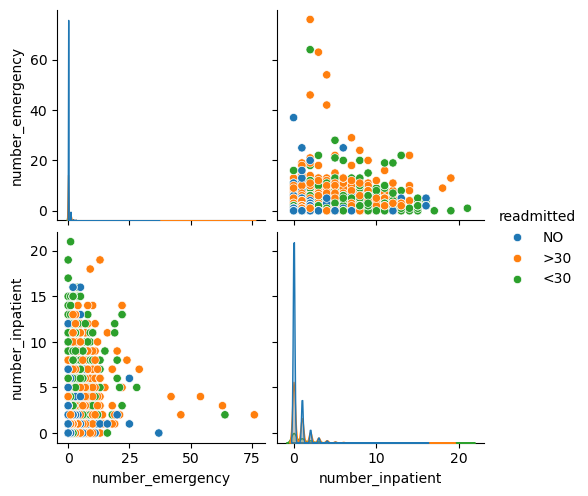

In [30]:
sns.pairplot(
    df[["number_emergency","number_inpatient","readmitted"]],
    hue="readmitted"
)

In [31]:
#Diagonis impact
df["diag_1"].value_counts().head(10)

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
434    2028
Name: count, dtype: int64

In [32]:
pd.crosstab(df["diag_1"],df["readmitted"]).head(10)

readmitted,<30,>30,NO
diag_1,,,
10,0,0,1
11,0,3,7
110,0,1,1
112,14,26,33
114,0,1,0
115,0,0,2
117,0,4,5
131,0,2,0
133,0,0,1


In [33]:
#Create risk flag
df["high_risk"] = np.where(
    (df["number_inpatient"]>2) & (df["time_in_hospital"]>5),
    1,0
)

In [34]:
pd.crosstab(df["high_risk"], df["readmitted"], normalize="index")

readmitted,<30,>30,NO
high_risk,,,
0,0.108244,0.345834,0.545922
1,0.245382,0.486747,0.267871


In [35]:
#Encode target varaible
df["readmitted_flag"] = df["readmitted"].map({
    "No":0,
    ">30":1,
    "<30": 1
})

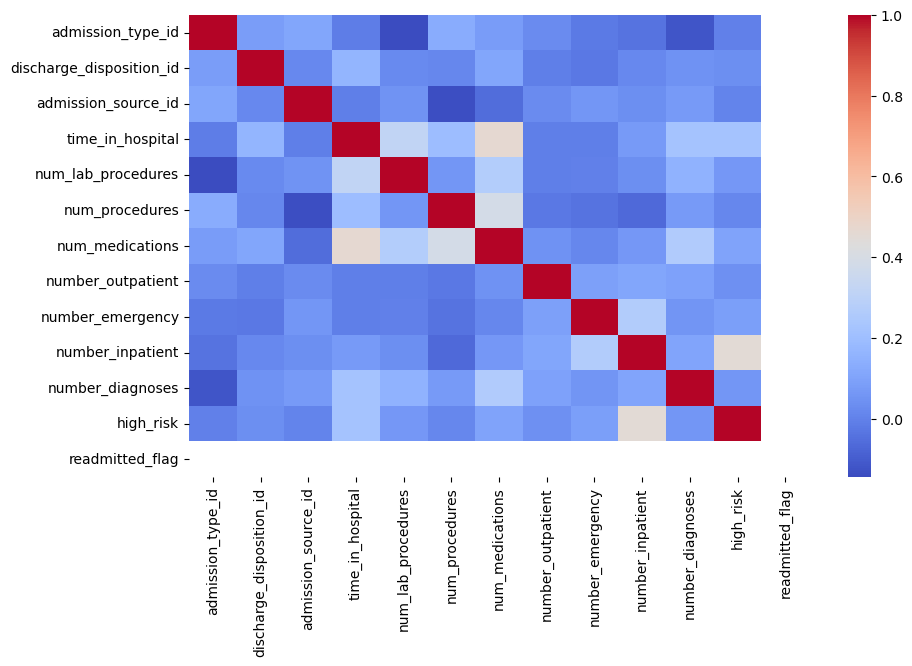

In [36]:
#Coreraltion check
num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), cmap="coolwarm")
plt.show()

In [37]:
#Business integration aggregation
df.groupby("age")["readmitted_flag"].mean().sort_values(ascending=False)

age
[0-10)      1.0
[10-20)     1.0
[20-30)     1.0
[30-40)     1.0
[40-50)     1.0
[50-60)     1.0
[60-70)     1.0
[70-80)     1.0
[80-90)     1.0
[90-100)    1.0
Name: readmitted_flag, dtype: float64

In [38]:
df.groupby("race")["readmitted_flag"].mean().sort_values(ascending=False)

race
AfricanAmerican    1.0
Asian              1.0
Caucasian          1.0
Hispanic           1.0
Other              1.0
Unknown            1.0
Name: readmitted_flag, dtype: float64

In [39]:
#Final data for modeling
final_df= df.select_dtypes(include=[np.number])
final_df.shape

(101766, 13)